# Spatio Temporal GNN for Earthquake Source Characterization
https://doi.org/10.1029/2022JB024401

Unified Earthquake Prediction Model

### Notes
**Abstract:** This model predicts earthquake start locatin and magnitudes. It utilizes geographical and waveform information from multiple stations. 

- We design a multistation-based graph neural network for earthquake source characterization
- Both geographic distance and waveform feature similarity are considered in a graph convolutional neural network for feature combination
- Our network is capable of automatically selecting and combining relevant seismic stations to characterize earthquake source parameters

**Introduction:**
- Integrated location and magnitude predictions extract full-waveform features with less computational expense than waveform inversion.
- Machine learning has been used for a long time, but not GNNs. Previous methods were only able to classify based on a single observation point.
- This is a dynamic graph because observation points can change in real time (ie station outages)
- Recently, graph methods have been used. Transformer model for earthquake early warning (Muncmeyer). Problem: hich computation cost restricts inputs to only a few stations. Van Den Ende and Ampuero (2020) use GCN (supposedly there is a pooling problem in this). Yano Et al, introduce multistation technique but edges are static. Mcbearty and Beroza propose a gGNN framework using multiple predefined graphs constructed on both labels and station locations. The model allows for variation in the set of input stations, but the inputs are waveform amplitudes and phase arrival times rather than whole waveforms. Ie, we want to find a way to get the whole waveform in, or some kind of embedding of the waveform. Maybe an autoencoder on the waveform and then continue the autoencoder as sequence prediction. Use a decoder to decode after some kind of pooling.

**Dataset:**
- Regional 2.5 < M < 6 earthquakes recorded by 185 seismic stations in Southern California from 2000 to 2019 [https://watermark.silverchair.com/423.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAA4EwggN9BgkqhkiG9w0BBwagggNuMIIDagIBADCCA2MGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMnkiBTSULRdc4CCpSAgEQgIIDNFENZ44ghTN_t0WFXQAAfNzPCNoGE__R876ju4EAmcpQwGax2jRbkg9MmZ4mv1ALNNX7LC_-I7zZD_scoNDrLLzMa9Wzorm87EIcA_8RtFZmNWEdeiFbJZU-jdUdM2OtTLcAdt6mznNGoAsiMDHQkxxn6tsIhebVqXDCtsbwCitydb8lhKElOZ99Yv_VbDwqt_PcxsV0v3HPA-zv8IuM_e-26IIBHr_MHCK47vuH6pUw1wcn5AGzxnvF3-Uh5FnHMdJbl5XeUwRFTiuCXxNNeQwt7r9Eu5XsykbObj28dXnHOkIqAvW1YsZbYgQ0wxRcnNEbbXFLKsHne4y2Y8Z4SniQGOV9SYsNuIhBmnFRZj4SZ2lPLsFByRHgEwv6ZX5iL0GkuSBRyHBxi1EybrWXm-2fFb-w0kgg0SM2U_NQD9B5r8uMo-MCYLmLVqHCASna1mOW3QLAI8giJBjpZmrwTBEvy1fxZCuWEhyaU4h9gu-MTtf4W-qQWn3ZChyGBcMcB6xDgIdUf5F3XaAhJmdPAsFQDtWsCMtTfqAbxw2h1JqaqBlCNjaTqba3LIhW9NNCCQek3MVbFVYhUSGDqOu5Y9O7I9T6ueG_gRIvMqvcZ6U1TJ6OvQndyL59mU1AszrXaHRA_QaxRFNKP8EkLRgmBrZnxUgLn9qiinVUDl_1n_2PmS_z_flkq19FDxewMwGQ1sjiq8vM-_in0QyChitCfbuR4-paHlZnTtn8b0KLaN2CTyZsoENeEkuL9aVucDEQuwCAESsahDAnpW4PReSAi2zmet-gJl2xpyHDW-ohd3GhBflIN4520zuit7ViCMzcDajA9QiESTjNe8QnI_utb2OKIBVfSVpMyf-XBaPNKiEbveZGtevRFoZnJNU0oLnnokN3CGxQUw6OgoKM39guCzpJ6-fwuZyV5CuGP5LAlxBovHWOXtu3qHrolF0Zoc9WYw7Cj1k5ZbFlDc-r97VdWj_C7mcQ_vSPUz7tdicc4_clK0Z-tbttDvXvqwBLNgPwX2Njk2-6b50NfQm_sdNrqfuOrhmosiy-eLkUpYPGwq9HlVUikgIv7UwflZkSY15LooXGWik]

**Methodology**
- They use a dynamic graph with dynamic edges
- They use EdgeConv layers to automatically generate edges between nodes, instead of manually constructing fixed edges.
- Consists of the major components:
1. Waveform feature extraction: Extract temporal features from the waveform recorded at each seismic station useing a CNN-based encoder. The three-channel seismic recordings are reduced to a low dimensional representation.
2. Spatial feature fusion: Represent as graph, each node (station) is connected to other nodes by automatically generated edges. Through iterative steps of edge generation and convolution, the perceptive field is gradually enlarged. Considers both geographic locations and waveform feature similarity among multiple seismic stations.
3. Prediction: MLP outputs four normalized scalars corresponding to lattitude, longitude, depth, and magnitude based on features learned from the previous steps.
Questions: How does this temporal thing work. How are edges generated. Edges are dynamic, but are they static per training step. At what point are edges generated?
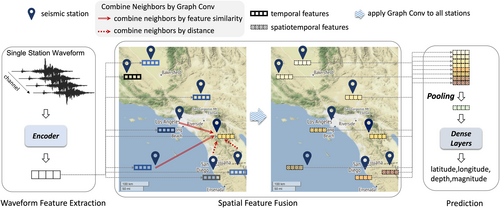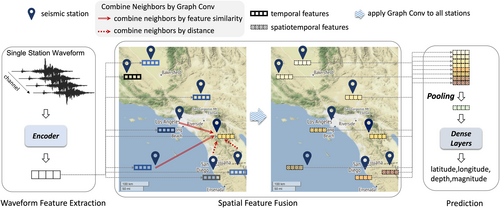

"The goal of each graph convolutional layer is to enlarge the perceptive field"

Edge Generation: Each station node is connected to several other nodes based on two criteria: Geographic distance and Feature similarity. For feature similarity, use dot product, or something. (They use the pairwise distance matrix)

Nodes are linked to its k-nearest neighbors.
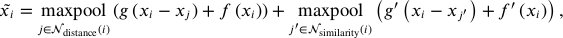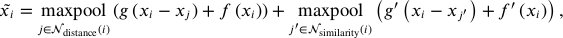
They use the max() aggregator. I'm not sure how this is different from GAT. In this case there are 4 learnable matrices. 

The model takes as inputs a list of station coordinates and waveforms recorded by each station. Each input can contain an arbitrary set of stations. 

Their encoder in indepent. 

Potential improvement: Make the encoder semi supervised (ie backprop at the same time). I don't think this works though. 





## Working with the dataset


In [1]:
import obspy
from obspy import read
import boto3
from botocore import UNSIGNED
from botocore.config import Config
s3=boto3.resource('s3',config=Config(signature_version=UNSIGNED))


In [2]:
BUCKET_NAME = 'scedc-pds'
KEY='continuous_waveforms/2017/2017_180/CIGSC__BHZ___2017180.ms'

In [3]:
s3.Bucket(BUCKET_NAME).download_file(KEY,'CIGSC__BHZ___2017180.ms')

In [4]:
ch = read('data/CIGSC__BHZ___2017180.ms')
print (ch)

2 Trace(s) in Stream:
CI.GSC..BHZ | 2017-06-29T00:00:00.019500Z - 2017-06-29T16:02:03.744500Z | 40.0 Hz, 2308950 samples
CI.GSC..BHZ | 2017-06-29T16:02:10.594538Z - 2017-06-29T23:59:59.994538Z | 40.0 Hz, 1146777 samples
